In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
%pylab inline
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


In [4]:
df = pd.read_csv("/content/drive/MyDrive/analisis datos/datasets/oficina-rescate-denuncias-202001-202111.csv")

In [5]:
df.head()

,fecha_ingreso,hora_ingreso,nro_registro_interno,situacion,origen,es_anonima,tema,subtema,provincia,localidad,dependencia_alta,via_ingreso,derivacion_institucion,derivacion_fecha,derivacion_judicializa,derivacion2_institucion,derivacion2_fecha,derivacion2_judicializa,derivacion3_institucion,derivacion3_fecha,derivacion3_judicializa,denunciante_nacionalidad,denunciante_provincia,denunciante_localidad,denunciante_tipo,denunciante_como_conocio_la_linea,denunciante_genero,denunciante_edad_aparente,provincia_indec_id
0,2020-01-01,20:32,584554505,Urgencia,Ciudadano,No,Trata,Explotación sexual,Buenos Aires,Maquinista Savio,PNR - Línea 145,Línea 145,Protex,2020-01-01 20:27,Si,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Denunciante - ciudadano,NaN,Hombre,NaN,6.0
1,2020-01-01,21:06,2584554505,Emergencia,Institución,No,Trata,"Explotación sexual niñas, niños y adolescentes",Buenos Aires,Ciudad Autónoma de Buenos Aires,PNR - Línea 145,Línea 145,Gendarmería Nacional Argentina,2020-01-01 20:52,Si,NaN,NaN,NaN,NaN,NaN,NaN,Argentina,Buenos Aires,Ciudad Autónoma de Buenos Aires,Denunciante - ciudadano,NaN,Mujer,NaN,6.0
2,2020-01-02,01:45,3584554505,Urgencia,Ciudadano,No,Trata,"Extracción forzosa de órganos, tejidos o fluidos",Buenos Aires,San Francisco Solano,PNR - Línea 145,Línea 145,Protex,2020-01-02 01:38,Si,NaN,NaN,NaN,NaN,NaN,NaN,Argentina,Buenos Aires,Claypole,Denunciante - ciudadano,NaN,Mujer,45.0,6.0
3,2020-01-02,16:52,594554505,Urgencia,Ciudadano,Si,Trata,Explotación sexual,Córdoba,Laboulaye,PNR - Línea 145,Línea 145,Protex,2020-06-24 15:13,Si,NaN,NaN,NaN,NaN,NaN,NaN,Argentina,NaN,NaN,Denunciante - ciudadano,Por publicidad en internet,Mujer,50.0,14.0
4,2020-01-02,18:46,1594554505,Urgencia,Ciudadano,No,Trata,Posible captación,NaN,NaN,PNR - Línea 145,Correo Institucional,Protex,2020-06-24 15:14,Si,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Denunciante - ciudadano,NaN,Hombre,NaN,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3213 entries, 0 to 3212
Data columns (total 29 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   fecha_ingreso                      3213 non-null   object 
 1   hora_ingreso                       3213 non-null   object 
 2   nro_registro_interno               3213 non-null   int64  
 3   situacion                          3212 non-null   object 
 4   origen                             3213 non-null   object 
 5   es_anonima                         3213 non-null   object 
 6   tema                               3213 non-null   object 
 7   subtema                            3213 non-null   object 
 8   provincia                          2911 non-null   object 
 9   localidad                          2677 non-null   object 
 10  dependencia_alta                   3213 non-null   object 
 11  via_ingreso                        3190 non-null   objec

// pd.to_datetime sirve para convertir los objetos en fechas u hora.

In [7]:
df['fecha_ingreso'] = pd.to_datetime(df['fecha_ingreso'])

In [8]:
df['fecha_ingreso'] = pd.to_datetime(df['fecha_ingreso'], format="%H%M")

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3213 entries, 0 to 3212
Data columns (total 29 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   fecha_ingreso                      3213 non-null   datetime64[ns]
 1   hora_ingreso                       3213 non-null   object        
 2   nro_registro_interno               3213 non-null   int64         
 3   situacion                          3212 non-null   object        
 4   origen                             3213 non-null   object        
 5   es_anonima                         3213 non-null   object        
 6   tema                               3213 non-null   object        
 7   subtema                            3213 non-null   object        
 8   provincia                          2911 non-null   object        
 9   localidad                          2677 non-null   object        
 10  dependencia_alta                   3

In [10]:
df.columns

Index(['fecha_ingreso', 'hora_ingreso', 'nro_registro_interno', 'situacion',
       'origen', 'es_anonima', 'tema', 'subtema', 'provincia', 'localidad',
       'dependencia_alta', 'via_ingreso', 'derivacion_institucion',
       'derivacion_fecha', 'derivacion_judicializa', 'derivacion2_institucion',
       'derivacion2_fecha', 'derivacion2_judicializa',
       'derivacion3_institucion', 'derivacion3_fecha',
       'derivacion3_judicializa', 'denunciante_nacionalidad',
       'denunciante_provincia', 'denunciante_localidad', 'denunciante_tipo',
       'denunciante_como_conocio_la_linea', 'denunciante_genero',
       'denunciante_edad_aparente', 'provincia_indec_id'],
      dtype='object')

In [11]:
df["hora_ingreso"]

0       20:32
1       21:06
2       01:45
3       16:52
4       18:46
        ...  
3208    09:14
3209    13:28
3210    20:58
3211    14:08
3212    16:58
Name: hora_ingreso, Length: 3213, dtype: object

Se arma tabla con las columnas que voy a usar

In [12]:
datos_llamadas = df.loc[:, ["fecha_ingreso","hora_ingreso", 'origen', 'es_anonima', 'tema', 'subtema', 'provincia', "derivacion_judicializa"]]

In [13]:
datos_llamadas

,fecha_ingreso,hora_ingreso,origen,es_anonima,tema,subtema,provincia,derivacion_judicializa
0,2020-01-01,20:32,Ciudadano,No,Trata,Explotación sexual,Buenos Aires,Si
1,2020-01-01,21:06,Institución,No,Trata,"Explotación sexual niñas, niños y adolescentes",Buenos Aires,Si
2,2020-01-02,01:45,Ciudadano,No,Trata,"Extracción forzosa de órganos, tejidos o fluidos",Buenos Aires,Si
3,2020-01-02,16:52,Ciudadano,Si,Trata,Explotación sexual,Córdoba,Si
4,2020-01-02,18:46,Ciudadano,No,Trata,Posible captación,NaN,Si
...,...,...,...,...,...,...,...,...
3208,2021-10-19,09:14,Ciudadano,Si,Trata,Explotación laboral,Formosa,No
3209,2021-10-21,13:28,Ciudadano,Si,Trata,Explotación laboral,Buenos Aires,No
3210,2021-11-06,20:58,Ciudadano,Si,Trata,Posible abuso sexual,Entre Ríos,Si
3211,2021-11-22,14:08,Ciudadano,No,Trata,Otro,NaN,Si


In [14]:
datos_llamadas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3213 entries, 0 to 3212
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   fecha_ingreso           3213 non-null   datetime64[ns]
 1   hora_ingreso            3213 non-null   object        
 2   origen                  3213 non-null   object        
 3   es_anonima              3213 non-null   object        
 4   tema                    3213 non-null   object        
 5   subtema                 3213 non-null   object        
 6   provincia               2911 non-null   object        
 7   derivacion_judicializa  2825 non-null   object        
dtypes: datetime64[ns](1), object(7)
memory usage: 200.9+ KB


agregamos columnas para analizar fechas mas especificas

In [15]:
datos_llamadas["año"] = datos_llamadas["fecha_ingreso"].dt.year
datos_llamadas["mes"] = datos_llamadas["fecha_ingreso"].dt.month


In [16]:
datos_llamadas

,fecha_ingreso,hora_ingreso,origen,es_anonima,tema,subtema,provincia,derivacion_judicializa,año,mes
0,2020-01-01,20:32,Ciudadano,No,Trata,Explotación sexual,Buenos Aires,Si,2020,1
1,2020-01-01,21:06,Institución,No,Trata,"Explotación sexual niñas, niños y adolescentes",Buenos Aires,Si,2020,1
2,2020-01-02,01:45,Ciudadano,No,Trata,"Extracción forzosa de órganos, tejidos o fluidos",Buenos Aires,Si,2020,1
3,2020-01-02,16:52,Ciudadano,Si,Trata,Explotación sexual,Córdoba,Si,2020,1
4,2020-01-02,18:46,Ciudadano,No,Trata,Posible captación,NaN,Si,2020,1
...,...,...,...,...,...,...,...,...,...,...
3208,2021-10-19,09:14,Ciudadano,Si,Trata,Explotación laboral,Formosa,No,2021,10
3209,2021-10-21,13:28,Ciudadano,Si,Trata,Explotación laboral,Buenos Aires,No,2021,10
3210,2021-11-06,20:58,Ciudadano,Si,Trata,Posible abuso sexual,Entre Ríos,Si,2021,11
3211,2021-11-22,14:08,Ciudadano,No,Trata,Otro,NaN,Si,2021,11


¿Hubo algun dia con mayor cantidad de llamados?

In [17]:
datos_llamadas["fecha_ingreso"].value_counts()

2020-03-23    27
2021-05-20    12
2021-11-23    12
2021-11-18    12
2020-01-09    12
              ..
2021-01-10     1
2021-05-15     1
2021-06-13     1
2020-06-09     1
2021-06-21     1
Name: fecha_ingreso, Length: 677, dtype: int64

Se encuentra una cantidad significativamente elevada de llamados el dia 23 de marzo de 2020, con un total de 27. Los siguientes tres días consiguen una sumatoria de 12 llamados por dia, correspondientes al 4 de agosto de 2020, 20 de mayo de 2021 y 9 de enero de 2020. 

¿De que se hablaba en ese dia?

In [18]:
dia_mas_llamados = datos_llamadas[datos_llamadas["fecha_ingreso"] == "2020-03-23"]

dia_mas_llamados["subtema"].value_counts()



Covid-19                              24
Privacion ilegitima                    1
Privacion ilegitima de la libertad     1
Explotación sexual                     1
Name: subtema, dtype: int64

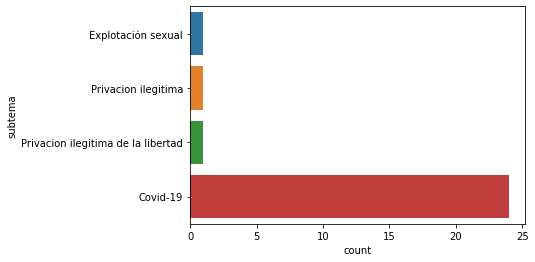

In [19]:
sns.countplot(y=dia_mas_llamados["subtema"])

El subtema principal de llamados recibidos el dia 23/03/2020, es Covid-19. Puede explicarse teniendo en cuenta que fue el primer dia habil de cuarentena obligatoria decretada por el Gobierno Nacional. 

In [20]:
dia_mas_llamados["provincia"].value_counts()

Buenos Aires    26
Mendoza          1
Name: provincia, dtype: int64

Los llamados de ese día provienen de la provincia de Bs As, con excepción de uno que tuvo su origen en Mendoza. 

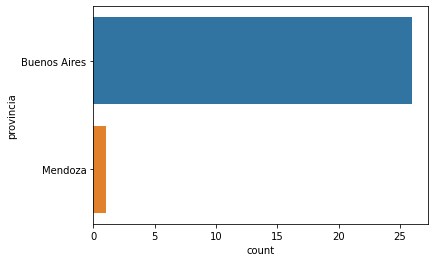

In [21]:
sns.countplot(y=dia_mas_llamados["provincia"])


In [22]:
datos_llamadas["subtema"].unique()

array(['Explotación sexual',
       'Explotación sexual niñas, niños y adolescentes',
       'Extracción forzosa de órganos, tejidos o fluidos',
       'Posible captación', 'Persona desaparecida', 'Explotación laboral',
       'Oferta laboral engañosa', 'Venta de niños y otros delitos',
       'Pornografía infantil, venta de niños y otros delitos, estafa',
       'Explotación sexual, explotación sexual niñas, niños y adolescentes',
       'Persona desaparecida, venta de niños y otros delitos',
       'Abuso sexual infantil', 'Persona desaparecida, posible captación',
       'Oferta laboral engañosa, posible captación',
       'Publicidad de oferta sexual',
       'Explotación laboral, explotación laboral niñas, niños y adolescentes',
       'Pornografía infantil', 'Otro',
       'Explotación sexual, pornografía infantil',
       'Explotación laboral niñas, niños y adolescentes',
       'Explotación laboral, explotación sexual',
       'Privación ilegítima de la libertad',
       'Explo

Subtema Covid fue un tema recurrente en los llamados?

In [23]:
subtema_covid = datos_llamadas[datos_llamadas["subtema"] == "Covid-19"]

subtema_covid["fecha_ingreso"].value_counts()

2020-03-23    24
2020-03-24     5
2020-04-20     1
2020-03-30     1
Name: fecha_ingreso, dtype: int64

¿Cual es el subtema que recibió más llamados?

In [24]:
datos_llamadas["subtema"].value_counts()

Explotación sexual                                1192
Explotación laboral                                496
Posible captación                                  280
Persona desaparecida                               234
Explotación sexual niñas, niños y adolescentes     231
                                                  ... 
Salud - vacunación antigripal                        1
Desconoce                                            1
Estafa y amenazas.                                   1
Covid- 19 - incumplimiento cuarentena                1
Acoso                                                1
Name: subtema, Length: 142, dtype: int64

¿Las llamadas son anonimas?

In [25]:
datos_llamadas["es_anonima"].value_counts()

No    1868
Si    1345
Name: es_anonima, dtype: int64

¿Que cantidad de llamadas logran judicializarse?

In [26]:
datos_llamadas["derivacion_judicializa"].value_counts()

Si    2086
No     736
si       3
Name: derivacion_judicializa, dtype: int64

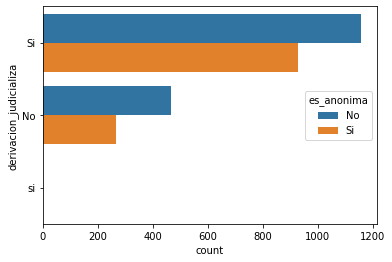

In [27]:
sns.countplot(y=datos_llamadas["derivacion_judicializa"], hue = datos_llamadas["es_anonima"])

Ingreso de llamadas según año y mes. 



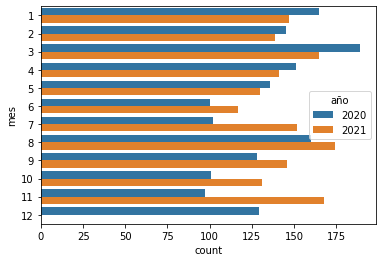

In [28]:
sns.countplot(y=datos_llamadas["mes"], hue = datos_llamadas["año"])

In [29]:
datos_llamadas["año"].value_counts()

2021    1610
2020    1603
Name: año, dtype: int64

In [30]:
agrupada_año = datos_llamadas.groupby("año")

In [31]:
agrupada_año["mes" ].value_counts()

año   mes
2020  3      189
      1      165
      8      160
      4      151
      2      145
      5      136
      12     129
      9      128
      7      102
      10     101
      6      100
      11      97
2021  8      174
      11     168
      3      165
      7      152
      1      147
      9      146
      4      141
      2      139
      10     131
      5      130
      6      117
Name: mes, dtype: int64

Cantidad de llamadas por provincia segun el año. 

In [32]:
agrupada_año["provincia" ].value_counts()

año   provincia                      
2020  Buenos Aires                       764
      Córdoba                            115
      Santa Fe                            85
      Ciudad Autónoma de Buenos Aires     76
      Mendoza                             75
      Neuquén                             47
      Tucumán                             43
      Misiones                            38
      Salta                               38
      Corrientes                          36
      Río Negro                           28
      Chubut                              22
      Jujuy                               22
      Santiago del Estero                 19
      Entre Ríos                          17
      Chaco                               14
      San Luis                            13
      Catamarca                           10
      Formosa                              7
      San Juan                             6
      Santa Cruz                           6
      La Rioja   

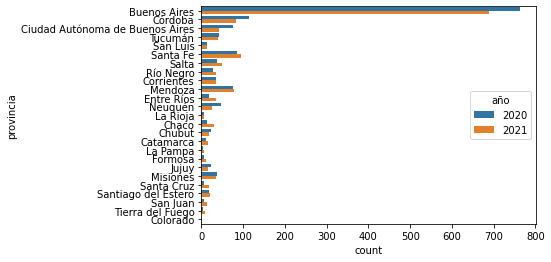

In [33]:
sns.countplot(y=datos_llamadas["provincia"], hue = datos_llamadas["año"])